# DECISION TREES
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from acquire import get_titanic_data, get_telco_data
from prepare import prep_titanic, prep_telco
import env

from FUNctions import describe_data, get_metrics_binary

1.) What is your baseline prediction? What is your baseline accuracy? 
- remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
titanic = get_titanic_data() 
#describe_data(titanic)
titanic = prep_titanic(titanic)
describe_data(titanic)

Using cached csv
The first three rows are: 
----------------------------------------------------------
   survived  pclass  sibsp  parch     fare  alone  Queenstown  Southampton  \
0         0       3      1      0   7.2500      0           0            1   
1         1       1      1      0  71.2833      0           0            0   
2         1       3      0      0   7.9250      1           0            1   

   male  
0     1  
1     0  
2     0  
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(891, 9)
-------------------------
The data types and column names are: 
['Queenstown', 'Southampton', 'alone', 'fare', 'male', 'parch', 'pclass', 'sibsp', 'survived']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null   

In [3]:
# Since my data is already prepared due to a previous exercise, I can immediately split. 
train, test = train_test_split(titanic, test_size=.2, random_state=123, stratify=titanic.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

train.shape, validate.shape, test.shape
# columns line up, good to go. 

((498, 9), (214, 9), (179, 9))

In [4]:
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [5]:
print(f'{titanic.survived.value_counts()}')
print('Based on this, the baseline is fatalities. Non-survivors.')
train['baseline'] = 0

0    549
1    342
Name: survived, dtype: int64
Based on this, the baseline is fatalities. Non-survivors.


In [6]:
accuracy_score(train.survived, train.baseline)

0.6164658634538153

2.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [34]:
model1 = DecisionTreeClassifier(max_depth=1)
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 79.92%
validate score: 76.17%


In [35]:
train['model1'] = model1.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,Queenstown,Southampton,male,baseline,model1,model2
583,0,1,0,0,40.1250,1,0,0,1,0,0,0
165,1,3,0,2,20.5250,0,0,1,1,0,0,1
50,0,3,4,1,39.6875,0,0,1,1,0,0,0
259,1,2,0,1,26.0000,0,0,1,0,0,1,1
306,1,1,0,0,110.8833,1,0,0,0,0,1,1


In [36]:
y_pred = model1.predict(X_train)

3.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [37]:
#using model score
model1.score(X_validate,y_validate)

0.7616822429906542

In [38]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,265,42
1,58,133


In [39]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [40]:
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


4.) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
# COnfusion Matrix will give me the values needed for TP, FP, TN, FN rates

In [44]:
#accuracy
acc = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_pred)
print(f' Confusion Matrix: \n {cm} \n ')

titanic_cm = confusion_matrix(y_train, y_pred)
titanic_cm

tn, fp, fn, tp = titanic_cm.ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre = sklearn.metrics.precision_score(y_train,y_pred)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_pred)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_pred)
print(f' The F1 score is: {f1:.2%}')

#support

#FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
#FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
#TP = np.diag(confusion_matrix)
#TN = confusion_matrix.sum() - (FP + FN + TP)
#
#print(FP, FN, TP, TN)

 The accuracy is: 79.92%
 Confusion Matrix: 
 [[265  42]
 [ 58 133]] 
 
Number of true negatives  (tn) =  265
Number of true positives  (tp) =  133
Number of false negatives (fn) =  58
Number of false positives (fp) =  42

What the confusion matrix tells us now, in more detail, is that we got 265
of the people who did not survive right, and 133 of the people who did survive right.
But also that we killed 58 of the passengers in our model,
and brought 42 of them back to life through Necromancy!
 The precision is: 76.00%
 The recall rate is: 69.63%
 The F1 score is: 72.68%


5.) Run through steps 2-4 using a different _depth value.

0.7523364485981309


[Text(161.878972303207, 210.645, 'X[7] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(76.01326530612245, 197.055, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(35.139358600583094, 183.465, 'X[3] <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(27.33061224489796, 169.875, 'X[3] <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(23.426239067055395, 156.285, 'X[2] <= 0.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(19.52186588921283, 142.695, 'X[1] <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(7.808746355685131, 129.10500000000002, 'X[3] <= 12.825\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(3.9043731778425657, 115.515, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(11.713119533527697, 115.515, 'X[3] <= 13.25\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(7.808746355685131, 101.925, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(15.617492711370263, 101.925, 'gini = 0.0\nsa

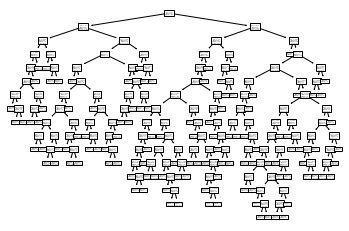

In [45]:
model2 = DecisionTreeClassifier(max_depth = 30)
model2.fit(X_train, y_train)
print(model2.score(X_validate,y_validate))
plot_tree(model2)

In [46]:
print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

training score: 94.58%
validate score: 75.23%


In [47]:
train['model2'] = model2.predict(X_train)
train.head()
y_pred2 = model2.predict(X_train)
print(f'{pd.crosstab(y_train, y_pred2)}')

col_0       0    1
survived          
0         305    2
1          25  166


In [49]:
print(classification_report(y_train, y_pred2))

#accuracy
acc2 = sklearn.metrics.accuracy_score(y_train, y_pred2)
print(f' The accuracy is: {acc2:.2%}')

#Confusion Matrix for TP FP TN FN
cm2 = confusion_matrix(y_train, y_pred2)
print(f' Confusion Matrix: \n {cm2} \n ')

titanic_cm2 = confusion_matrix(y_train, y_pred2)
titanic_cm2

tn2, fp2, fn2, tp2 = titanic_cm2.ravel()
print("Number of true negatives  (tn) = ",tn2)
print("Number of true positives  (tp) = ",tp2)
print("Number of false negatives (fn) = ",fn2)
print("Number of false positives (fp) = ",fp2)

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre2 = sklearn.metrics.precision_score(y_train,y_pred2)
print(f' The precision is: {pre2:.2%}')

#recall
rec2 = sklearn.metrics.recall_score(y_train,y_pred2)
print(f' The recall rate is: {rec2:.2%}')

#f1-score
f12 = sklearn.metrics.f1_score(y_train,y_pred2)
print(f' The F1 score is: {f12:.2%}')

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       307
           1       0.99      0.87      0.92       191

    accuracy                           0.95       498
   macro avg       0.96      0.93      0.94       498
weighted avg       0.95      0.95      0.95       498

 The accuracy is: 94.58%
 Confusion Matrix: 
 [[305   2]
 [ 25 166]] 
 
Number of true negatives  (tn) =  305
Number of true positives  (tp) =  166
Number of false negatives (fn) =  25
Number of false positives (fp) =  2

What the confusion matrix tells us now, in more detail, is that we got 265
of the people who did not survive right, and 133 of the people who did survive right.
But also that we killed 58 of the passengers in our model,
and brought 42 of them back to life through Necromancy!
 The precision is: 98.81%
 The recall rate is: 86.91%
 The F1 score is: 92.48%


6.) Which model performs better on your in-sample data?

In [51]:
print(f' The second model with a max_depth of 30 has an accuracy of: {acc2:.2%}, \n which is superior to the first model at {acc:.2%}')

 The second model with a max_depth of 30 has an accuracy of: 94.58%, 
 which is superior to the first model at 79.92%


7.) Which model performs best on your out-of-sample data, the validate set?

In [57]:
out_of_sample_accuracy = model1.score(X_validate, y_validate)
print(out_of_sample_accuracy)
out_of_sample_accuracy2 = model2.score(X_validate, y_validate)
print(out_of_sample_accuracy2)

# I have a feeling I did this incorrectly. 

0.7616822429906542
0.7523364485981309


# Same Exercises, this time on TELCO

In [2]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    The target is what I intend to stratify. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


1.) What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
telco = df = get_telco_data()
telco = df = prep_telco(telco)
telco.head()

Using cached csv


,senior_citizen,tenure,monthly_charges,churn,is_male,has_partner,has_dependent,has_phone,has_internet,fiber,no_contract,electronic_check,autopay
0,0,9,65.6,0,0,1,1,1,1,0,0,0,0
1,0,9,59.9,0,1,0,0,1,1,0,1,0,0
2,0,4,73.9,1,1,0,0,1,1,1,1,1,0
3,1,13,98.0,1,1,1,0,1,1,1,1,1,0
4,1,3,83.9,1,0,1,0,1,1,1,1,0,0


In [4]:
train_validate_test_split(telco, 'churn')
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [5]:
train.churn.value_counts() 
# as expected, those who did not churn outnumber those who did. 

0    2897
1    1046
Name: churn, dtype: int64

In [6]:
baseline = y_train.mode()
print(baseline)

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

0    0
dtype: int64
Baseline accuracy: 0.73


2.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

y_pred = tree1.predict(X_train)

training score: 78.85%
validate score: 79.07%


3.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [8]:
# model score
print(f' The Model score is: {tree1.score(X_validate, y_validate)}')

# One approach to confusion matrix
print(f' Confusion Matrix: \n {pd.DataFrame(confusion_matrix(y_train, y_predictions))}')
print('----------------------------')
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree with max depth of 3")
pd.DataFrame(report)

 The Model score is: 0.7906564163217031
 Confusion Matrix: 
       0    1
0  2715  182
1   652  394
----------------------------
Tree with max depth of 3


,0,1,accuracy,macro avg,weighted avg
precision,0.806356,0.684028,0.788486,0.745192,0.773905
recall,0.937176,0.376673,0.788486,0.656925,0.788486
f1-score,0.866858,0.485820,0.788486,0.676339,0.765776
support,2897.000000,1046.000000,0.788486,3943.000000,3943.000000


4.) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [10]:
acc = sklearn.metrics.accuracy_score(y_train, y_predictions)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_predictions)
print(f' Confusion Matrix: \n {cm} \n ')

telco_cm = confusion_matrix(y_train, y_predictions)
telco_cm

tn, fp, fn, tp = telco_cm.ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who churned right, and {tp} of the people who did not churn right.
But also we incorrectly churned {fn} customers in our model,
and mismarked {fp} of them as churners!""")

#precision
pre = sklearn.metrics.precision_score(y_train,y_predictions)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_predictions)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_predictions)
print(f' The F1 score is: {f1:.2%}')

 The accuracy is: 78.85%
 Confusion Matrix: 
 [[2715  182]
 [ 652  394]] 
 
Number of true negatives  (tn) =  2715
Number of true positives  (tp) =  394
Number of false negatives (fn) =  652
Number of false positives (fp) =  182

What the confusion matrix tells us now, in more detail, is that we got 2715
of the people who churned right, and 394 of the people who did not churn right.
But also we incorrectly churned 652 customers in our model,
and mismarked 182 of them as churners!
 The precision is: 68.40%
 The recall rate is: 37.67%
 The F1 score is: 48.58%


5.) Run through steps 2-4 using a different max_depth value.

In [13]:
# Make the model
tree2 = DecisionTreeClassifier(max_depth=15, random_state=123)

# Fit the model (on train and only train)
tree2 = tree2.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions2 = tree2.predict(X_train)

print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

y_predictions2 = tree2.predict(X_train)

training score: 78.85%
validate score: 79.07%


In [15]:
# model score
print(f' The Model score is: {tree2.score(X_validate, y_validate)}')

# One approach to confusion matrix
print(f' Confusion Matrix: \n {pd.DataFrame(confusion_matrix(y_train, y_predictions))}')
print('----------------------------')
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree with max depth of 15")
pd.DataFrame(report)

 The Model score is: 0.7451212300413956
 Confusion Matrix: 
       0    1
0  2715  182
1   652  394
----------------------------
Tree with max depth of 3


,0,1,accuracy,macro avg,weighted avg
precision,0.806356,0.684028,0.788486,0.745192,0.773905
recall,0.937176,0.376673,0.788486,0.656925,0.788486
f1-score,0.866858,0.485820,0.788486,0.676339,0.765776
support,2897.000000,1046.000000,0.788486,3943.000000,3943.000000


6.) Which model performs better on your in-sample data?

In [ ]:
# Now I am convinced I am doing this incorrectly 

7.) Which model performs best on your out-of-sample data, the validate set?

# Random Forest


1.) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



2.) Evaluate your results using the model score, confusion matrix, and classification report.


3.) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



4.) Run through steps increasing your min_samples_leaf and decreasing your max_depth.


5.) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?